<a href="https://colab.research.google.com/github/vineet-babar44/Job-Postings-Analysis/blob/main/1_EDA_for_Data_Analyst_roles_in_US_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis for Data Analysts in US
## Questions to Answer

1. Top job location for Data Analyst in the US
2. Information about job opportunities
3. Top companies hiring Data Analyst roles

*Step 1 :Importing Libraries*

In [ ]:
pip install datasets

In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

In [ ]:
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

*Step 2 : Data Cleaning*

In [3]:
df['job_posted_date'] =  pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

*Step 3 : Filtering Data for Data Analyst Jobs in US*

In [5]:
df_DA_US = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')]
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

## Q.1 Top job location for Data Analyst in the US

<Axes: title={'center': 'No. of Jobs per location'}, xlabel='No. of Jobs', ylabel='.'>

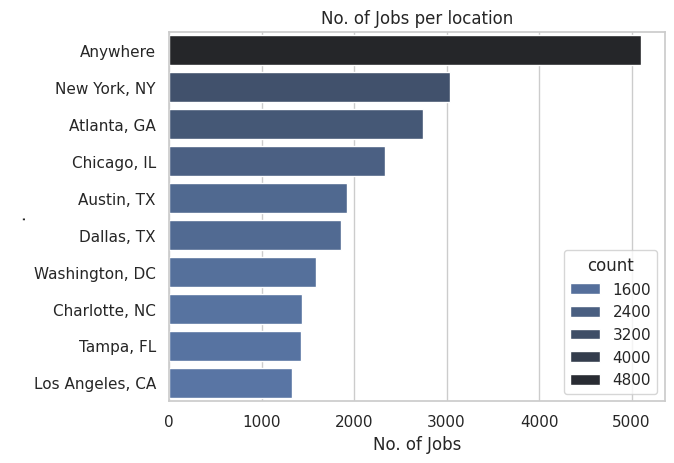

In [6]:
sns.set_theme(style="whitegrid")
# plt.figure(figsize=(10, 10))
plt.title('No. of Jobs per location')
plt.xlabel('No. of Jobs')
plt.ylabel('.')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r')

## Q.2 Information about job opportunities

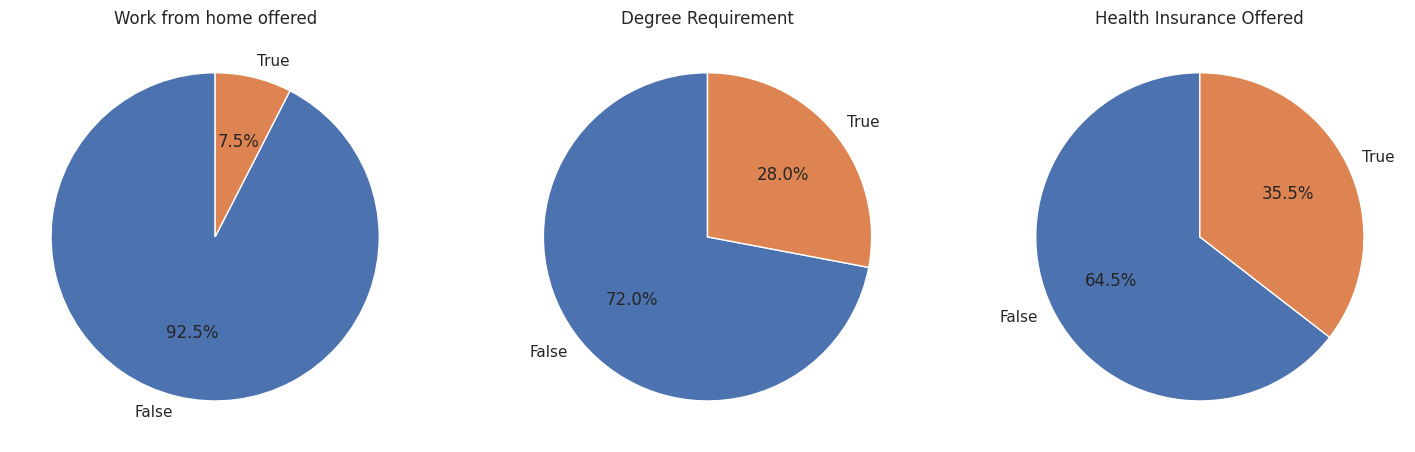

In [7]:
dict_column={
    'job_work_from_home' : 'Work from home offered',
    'job_no_degree_mention' : 'Degree Requirement',
    'job_health_insurance' : 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches(18, 6)

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)



## Q.3 Top companies hiring Data Analyst roles

<Axes: title={'center': 'No. of Companies for Data Analysts'}, xlabel='No. of Jobs', ylabel='.'>

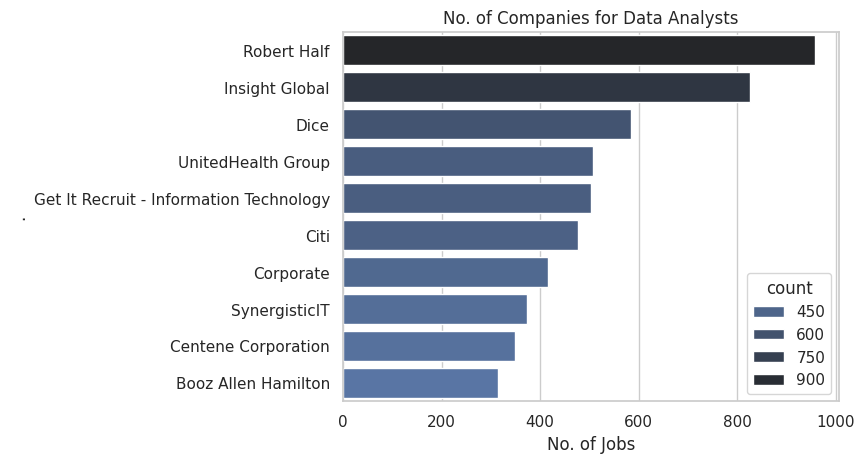

In [8]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style="whitegrid")
# plt.figure(figsize=(10, 10))
plt.title('No. of Companies for Data Analysts')
plt.xlabel('No. of Jobs')
plt.ylabel('.')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r')